## Sentiment Analysis of Food Reviews Using Score Feature


### Introduction

Customer reviews are a valuable resource for businesses aiming to improve their products and services. Sentiment analysis helps in understanding the emotional tone behind customer reviews. This project leverages the Score feature in the provided dataset to categorise reviews directly into positive, negative, or neutral sentiments.

The main objective is to preprocess the review text, create target labels if required and build a sentiment analysis model. The insights obtained will help businesses enhance their products and services based on customer feedback

If the rating is __4 or 5__ the it is consider as __Positive Sentiment__ and if rating is __1 or 2__ then __Negitive Sentiment__ and if the 
rating is __3__ then we consider it as __neutral__ but will not consider it because we need to find the Polarity(Positive/Negitive) of the review

### Attributes

### Primary Features:
__1. Id:__ Unique identifier for each review <br>
__2. ProductId:__ Unique identifier for the product<br>
__3. UserId:__ Unique identifier for the user<br>
__4. ProfileName:__ Profile name of the user<br>
__5. HelpfulnessNumerator:__ Number of users who found the review helpful<br>
__6. HelpfulnessDenominator:__ Number of users who indicated whether they found the review helpful or not<br>
__7. Score:__ Rating between 1 and 5<br>
__8. Time:__ Timestamp for the review<br>
__9. Summary:__ Brief summary of the review<br>
__10. Text:__ Text of the review<br>


#### 📥 Lets load our Dataset

In [44]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [45]:
food_review = pd.read_csv('Dataset.csv')

In [46]:
food_review.sample(50)

Id   ProductId          UserId  \
402422  402423  B002VASD24   ABXMGGZSMQFM2   
81126    81127  B0040DWCXG  A1G69SJPXWKWO1   
519885  519886  B000YSTIL0  A3MBU9VI7MB47E   
438641  438642  B005HGAV8I   AM45D0WU5C4EW   
368285  368286  B001ZWHGFO  A2W5IUAKVQRMBF   
395294  395295  B000H7ELTW   AL94DPPY619AM   
417156  417157  B00112ILZM   ATC610DZTJMH0   
534843  534844  B0018MR53Y  A2I4ZWBD6W561R   
97831    97832  B003GSVSNQ  A2VB3MBWER8QMW   
377309  377310  B004XZMVZK  A2Y08EFRMEFTHD   
104446  104447  B000YSRK7E  A165MAM6TS892W   
329085  329086  B003VXHGE6  A1HGXLP6WATS4B   
173679  173680  B00112JV60   ARZCOSCV0HUNB   
61574    61575  B001EO5R0Y   A2OOGNEEW60IQ   
53935    53936  B003HI2Z6O  A28JP9DX106FQD   
320265  320266  B003Z6W32E  A29RZZ8DXRCPJ0   
46655    46656  B001E530IE  A242Q6K6OMF94D   
141118  141119  B000BNVEDI  A21N5OVH997NA7   
290210  290211  B000IZ0OC6  A3N4DKNVIOU1G9   
460443  460444  B001CWU9E2  A3QGPFUH2D4S4S   
165355  165356  B001HWCF4O  A2RNYW2HIQBGSM   
116033  116034  B0026BQKT6  A1UMQSNGIUMF7C   
508395  508396  B0029JZMA8  A14F7MXMOGCOR8   
288220  288221  B000ENUC3S   AYGJ96W5KQMUJ   
343421  343422  B00004RBDU   ANICAIMW2SF22   
306444  306445  B001BOQ3QY   A93OVQE7171W0   
411920  411921  B000CQC05U   AD4MFIC8E2PZB   
526313  526314  B003VMW0ZC   AKBZD4VMJ1FF4   
420745  420746  B0040PUUKQ  A19636OLBGELAG   
541754  541755  B001EQ52P2  A2L01339XV496V   
138184  138185  B000YU0ONE  A3HD4EZXQ6VK0Q   
343000  343001  B0012C7VLG   ASLFT5EJ8XWRL   
269331  269332  B0027ZAMXQ  A22YSFQL5OHRSC   
155760  155761  B0009VO58S   A2YVWIU1B8HJ8   
47358    47359  B001EPQVFS   A3PQY16BQSGC3   
447114  447115  B00473VGHW   ATZTIU71681SO   
453348  453349  B0029XLH4Y  A1XM83D7NKPOVY   
168608  168609  B0001ES9F8   A4AF016IPVEYY   
176557  176558  B002E0KW1Q  A30RQO7CIU0HBF   
125158  125159  B002MBKF0U  A21KR27KC5JLFK   
385994  385995  B000GG1O6W  A15825UTP3XHSE   
106281  106282  B00264TMWU  A1NLP7U3ZOPTT7   
383097  383098  B000RJ4ZK0  A3BII2BT4KNZAI   
535925  535926  B003VXHGDM  A121VLJBL8T0H1   
13191    13192  B002TMV34E  A11FFLD0GV82CQ   
1092      1093  B0025ULYKI  A2MZ43MMIBFL7M   
89144    89145  B001E5E1MI  A18R6HLQYSIVP2   
366867  366868  B002W9JILE  A3SYKD35HCZGVS   
533004  533005  B009E7YC54   AYFLML14EPVQV   
187220  187221  B004S036FO  A3FKRI95UOQ9MU   

                                       ProfileName  HelpfulnessNumerator  \
402422                                 Ginger "me"                     0   
81126                                 Barbiedoll12                     1   
519885                                         DOc                     0   
438641                         Natasha "sushirama"                     0   
368285                    C. Jensen "K9 Happy Gal"                     0   
395294                       Carl R. Hinkelman Jr.                     0   
417156                                       Diana                     5   
534843                                     Claudia                     0   
97831                                           KO                     3   
377309               Cindy Williams "stormloverf5"                     2   
104446                                         fpl                     1   
329085          F. D. Gillett "Comparison Shopper"                     8   
173679                                 ashley chen                     1   
61574                                     M. Bolin                     5   
53935     I. D. Barbosa "one million dollar smile"                     1   
320265                        E. S. Noli "dzign17"                     0   
46655   Annette Weatherman "Rock Around the World"                     2   
141118                                       Diana                     0   
290210                                Judy A. Bush                     0   
460443                                   S. Tucker                     0   
165355                              Carlos Alvarez                   

🔎 here we can see that data has so many cleanlliness issue

### Cleaning The Dataset

### Basic Data Analysis

In [50]:
food_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


#### 🔎 __Time__ should be in datetime format 

In [52]:
food_review.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

#### 🔎 Here we can see that there are null values in __ProfileName__ and __Summary__ 

In [54]:
food_review.describe(include = 'O')

ProductId          UserId       ProfileName     Summary  \
count       568454          568454            568428      568427   
unique       74258          256059            218415      295742   
top     B007JFMH8M  A3OXHLG6DIBRW8  C. F. Hill "CFH"  Delicious!   
freq           913             448               451        2462   

                                                     Text  
count                                              568454  
unique                                             393579  
top     This review will make me sound really stupid, ...  
freq                                                  199

#### 🔎 Here we can see that there are so many duplicate entries 

In [56]:
food_review['Text'].sample(50)

486293    These artichoke "hearts" contain too much leaf...
334622    I ordered these lollipops to go on top of a ca...
72523     The recipient enjoys having the snacks availab...
387627    If you're buying these coffee pods for use in ...
324626    I purchased the Caramel Apple Pops to share at...
46948     I bought the dreamfields lasagna noodles becau...
45231     Excellent nuts.  hard to find in stores.  grea...
384308    So hard to get in the United States, it was a ...
403996    Some mornings I just don't have time to make m...
477102    This pack of yeast is an amazing deal! It has ...
568415                     as it should be for $6 a bottle.
487815    Our Terrier is super picky but he always finis...
408183    I purchased this product both for my dog and m...
172587    We agree with the other reviews of Quaker Oatm...
37626     I've yet to run into a product where, after sa...
60159     This same product was almost $13 for a 16 oz. ...
417164    Okay, so it isn't the best tas

#### 🔎 Here we can see that there is so much dirty data in text attribute
1. URL are present
2. html tags are present
3. stopword also present
4. Lots of Phrases in the data like can't,wont't......etc

### 📝 Let's list down all the cleanliness issues

1. __Time__ wrong datatype 
2. __ProfileName__ contains 26 and __Summary__ contains 27 __Null__ values
3. There is __Duplicacy__ in the dataset
4. __Text__ contain __URL__, __HTML__, __stopwords__, __Phrases__

### 🧹 Rectifing Cleanliness issuess

In [61]:
df_review = food_review.copy()

we will convert Time into datetime 

In [63]:
df_review['Date'] = pd.to_datetime(df_review['Time'], unit = 's')

In [64]:
df_review

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text       Date  
0       I have bought several of the Vitality canned d... 2011-04-27  
1       Product arrived labeled as Jumbo Salted Peanut... 2012-09-07  
2       This is a confection that has been around a fe... 2008-08-18  
3       If you are looking for the secret ingredient i... 2011-06-13  
4       Great taffy at a great price.  There was a wid... 2012-10-21  
...                                                   ...        ...  
568449  Great for sesame chicken..this is a good if no... 2011-03-09  
568450  I'm disappointed with the flavor. The chocolat... 2012-03-09  
568451  These stars are small, so you can give 10-15 o... 2012-02-21  
568452  These are the BEST treats for training and rew... 2012-03-13  
568453  I am very satisfied ,product is as advertised,... 2012-05-31  

[568454 rows x 11 columns]

#### Checking the null values

In [66]:
df_review.loc[df_review['ProfileName'].isnull() == True , ['ProfileName']]


ProfileName
10616          NaN
25509          NaN
38874          NaN
47923          NaN
49800          NaN
67077          NaN
106550         NaN
121819         NaN
125452         NaN
137613         NaN
163191         NaN
172462         NaN
211846         NaN
268648         NaN
297275         NaN
306751         NaN
331647         NaN
358674         NaN
431598         NaN
440825         NaN
461668         NaN
490412         NaN
491728         NaN
515436         NaN
517676         NaN
560446         NaN

#### Lets replace the NaN with Unknown in ProfileName

In [68]:
df_review.loc[df_review['ProfileName'].isnull() == True , ['ProfileName']] = 'unknown'

In [69]:
df_review['ProfileName'].isnull().sum()

0

In [70]:
pd.set_option('display.max_colwidth', None)

In [71]:
df_review.loc[df_review['Summary'].isnull() == True , ['Text']] 

Text
33958                       I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
40548                       I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
101106                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
102979                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
117515                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
155712                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
178290                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
198474                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
212691                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
237565  This is a cool system only problem is that the coffee is no longer hot once it drains into your cup. If you are using it to make ice coffee though, it's great!
293906                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
299495                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
300961                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
333556                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
352043                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
357215                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
357814                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
360782                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
379473                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
380558                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
381313                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
386283                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
392529                                        I like the product and tried it before I puchased it. However, one of the boxes arrived have only 10 in it instead of 12.
484367                      I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad tast

#### we can see that the place where null value is present in the summary has maximum duplicate values in the Text attribute

#### removing the duplicates

In [74]:
df_review[df_review.duplicated(subset = ['UserId','ProfileName','Time','Text'], keep = False)].shape

(232415, 11)

#### there are 232415 rows are duplicate

In [76]:
df_review.drop_duplicates(subset = ['UserId','ProfileName','Time','Text'], keep='first',inplace= True, ignore_index = True)

now check the null values

In [78]:
df_review.shape

(393933, 11)

In [79]:
df_review.loc[df_review['Summary'].isnull() == True , ['Text']] 

Text
31845                       I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either.
188426  This is a cool system only problem is that the coffee is no longer hot once it drains into your cup. If you are using it to make ice coffee though, it's great!
286451                                        I like the product and tried it before I puchased it. However, one of the boxes arrived have only 10 in it instead of 12.

#### we can put summary by manaully in the data set for these three rows

In [81]:
df_review.loc[31845,['Summary']] = 'Not so good not so bad'
df_review.loc[188426,['Summary']] = 'good for ice coffee problem with hot coffee'
df_review.loc[286451,['Summary']] = 'quantity issue'

In [82]:
df_review['Summary'].isnull().sum()

0

#### Now we will handel the Text data

#### Important libreries 

In [85]:
# pip install nltk

In [86]:
#pip install textblob

In [87]:
# pip install tqdm

In [88]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
from textblob import TextBlob
from tqdm import tqdm

In [89]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyansh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
print(stop_words)

{'not', 'their', "mustn't", 'haven', 'out', 'both', 'from', "it's", 'all', 'aren', 'weren', 'with', 'an', 'wouldn', 'own', 'm', 'has', 'theirs', "that'll", 'on', 'should', "won't", 'each', 've', 'there', "isn't", 'does', 'further', 'being', 'who', "you've", 'yourselves', 'wasn', 'won', 'your', 'those', 'been', 'or', 'hers', "didn't", 'while', 'doesn', "shan't", 'his', 'our', 'do', 'no', 'these', 'did', 'he', 'here', 'and', 'this', 'where', 'himself', 'yourself', "she's", 'some', 'me', 'will', 'have', 'nor', 're', 'above', 'i', "haven't", 'too', 'as', 'just', 't', 'against', "aren't", 'up', "you're", 'the', 'any', 'myself', 'them', 'was', 'her', 'into', 'shan', "wouldn't", "couldn't", "hadn't", "shouldn't", 'she', 'my', "you'd", 'are', 'is', 'for', 'of', 'they', 'shouldn', 'ain', 'once', "mightn't", 'ourselves', 'under', 'we', 'but', 'during', 'when', 'couldn', "hasn't", "weren't", 'how', 'were', 'about', 'few', 'more', "you'll", 'off', 'it', 'yours', 'be', 'between', 'didn', 'down', 'h

In [91]:
# some phrases to be convert 
def expanded(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

clean_reviews = []

# tqdm is for printing the status bar
for document in tqdm(df_review['Text'].values):
    # removing urls
    document = re.sub(r"http\S+", "",document)
    # removing html tags
    document = BeautifulSoup(document, 'lxml').get_text()
    # expanding phrases
    document = expanded(document)
    # removing extra spaces 
    document = re.sub("\S*\d\S*","",document).strip()
    # spelling mistake
    # document = TextBlob(document)
    # document = document.correct().string
    # removing non alphabate
    document = re.sub('[^A-Za-z]+', ' ',document )
    # removing stopwords
    document =  ' '.join(i.lower() for i in document.split() if i.lower() not in stop_words)

    clean_reviews.append(document.strip())
    
    


100%|████████████████████████████████| 393933/393933 [00:30<00:00, 12820.30it/s]


In [92]:
a = TextBlob(clean_reviews[1])
a = a.correct().string

In [93]:
a

'product arrived labelled lumbo halted peanuts peanuts actually small sized insulted sure error vendor intended represent product lumbo'

In [94]:
df_review['clean_text'] = clean_reviews

In [95]:
#### now we convert score to our target variable by coverting the points greater then 3 to 1 and less then equal to 3 to 0

In [96]:
df_review['Sentiment'] = df_review['Score'].apply(lambda x: 1 if x > 3 else 0 )

In [97]:
df_review['Sentiment'].unique()

array([1, 0])

In [98]:
#### drop column Text 

In [99]:
df_review.drop(columns = 'Text', axis = 1 , inplace =True)

In [100]:
df_review

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
393928  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
393929  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
393930  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
393931  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
393932  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
393928                     0                       0      5  1299628800   
393929                     0                       0      2  1331251200   
393930                     2                       2      5  1329782400   
393931                     1                       1      5  1331596800   
393932                     0                       0      5  1338422400   

                                   Summary       Date  \
0                    Good Quality Dog Food 2011-04-27   
1                        Not as Advertised 2012-09-07   
2                    "Delight" says it all 2008-08-18   
3                           Cough Medicine 2011-06-13   
4                              Great taffy 2012-10-21   
...                                    ...        ...   
393928                 Will not do without 2011-03-09   
393929                        disappointed 2012-03-09   
393930            Perfect for our maltipoo 2012-02-21   
393931  Favorite Training and reward treat 2012-03-13   
393932                         Great Honey 2012-05-31   

                                                                                                                                                                                                                                                                                          clean_text  \
0                                                                                                                               bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better   
1                                                                                                                                                              product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo   
2       confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch   
3                                                                                                                                                                   looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal 

#### We had performed the Data cleaning part now we will perform the EDA part

## 1. Analyzing Review with Time

In [103]:
df = df_review[['Score', 'Date', 'clean_text']]

In [104]:
df['Date'] = pd.to_datetime(df['Date'],unit='s')
df['Date'] = df['Date'].dt.to_period('M')

In [105]:
df['Date']

0         2011-04
1         2012-09
2         2008-08
3         2011-06
4         2012-10
           ...   
393928    2011-03
393929    2012-03
393930    2012-02
393931    2012-03
393932    2012-05
Name: Date, Length: 393933, dtype: period[M]

In [106]:
df = df.sort_values(by = 'Date').reset_index(drop = True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393933 entries, 0 to 393932
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype    
---  ------      --------------   -----    
 0   Score       393933 non-null  int64    
 1   Date        393933 non-null  period[M]
 2   clean_text  393933 non-null  object   
dtypes: int64(1), object(1), period[M](1)
memory usage: 9.0+ MB


In [108]:
score_1 = df[df['Score'] == 1]
score_2 = df[df['Score'] == 2]
score_3 = df[df['Score'] == 3]
score_4 = df[df['Score'] == 4]
score_5 = df[df['Score'] == 5]

In [109]:
df_1 = score_1.groupby('Date')['Score'].count().reset_index()
df_2 = score_2.groupby('Date')['Score'].count().reset_index()
df_3 = score_3.groupby('Date')['Score'].count().reset_index()
df_4 = score_4.groupby('Date')['Score'].count().reset_index()
df_5 = score_5.groupby('Date')['Score'].count().reset_index()

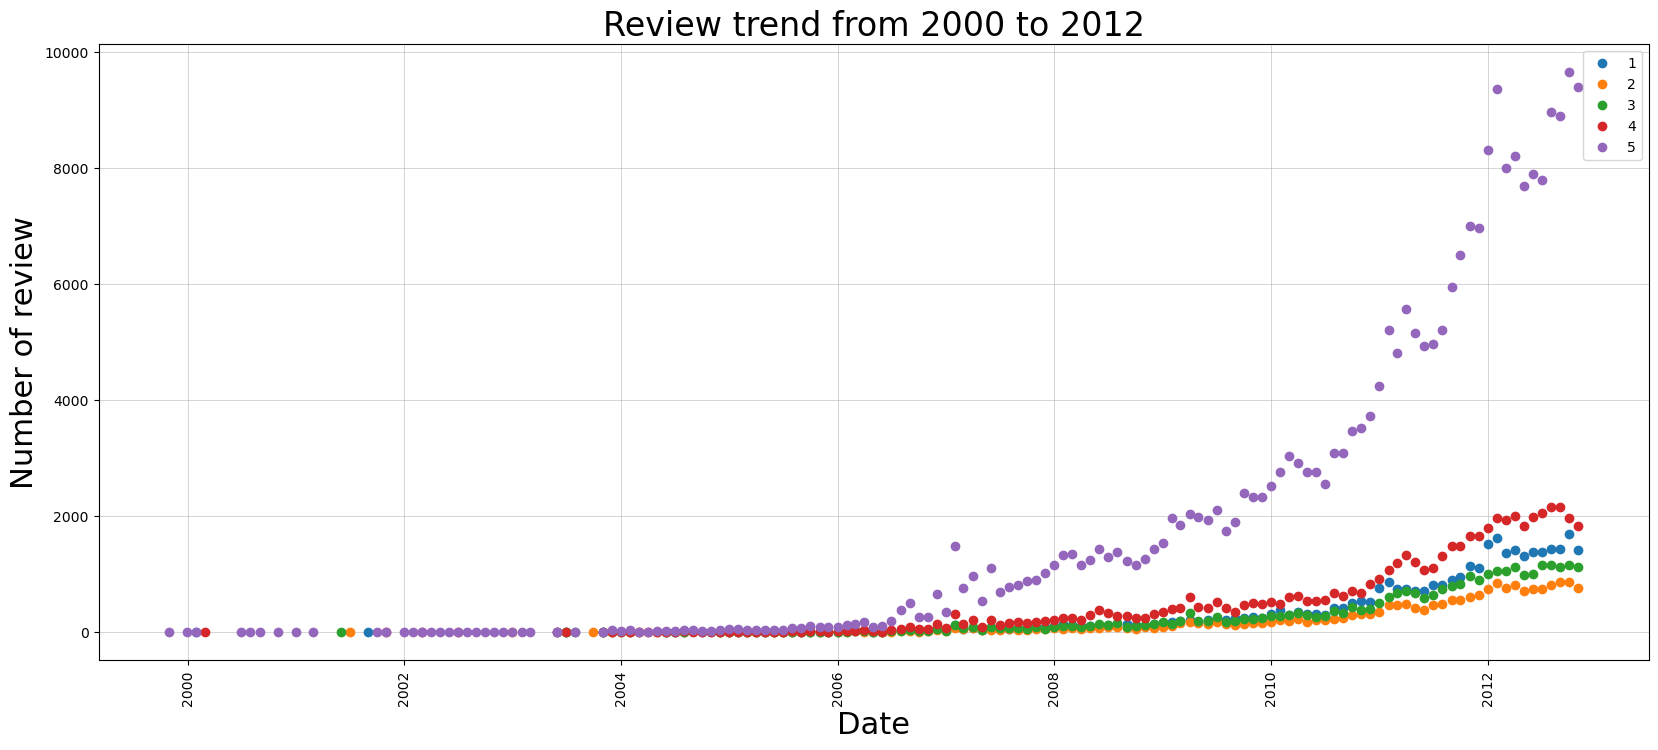

In [110]:
plt.figure(figsize=(20,8))
plt.plot_date(x = df_1['Date'], y = df_1['Score'], label = '1')
plt.plot_date(x = df_2['Date'], y = df_2['Score'], label = '2')
plt.plot_date(x = df_3['Date'], y = df_3['Score'], label = '3')
plt.plot_date(x = df_4['Date'], y = df_4['Score'], label = '4')
plt.plot_date(x = df_5['Date'], y = df_5['Score'], label = '5')
plt.grid(linewidth=0.5,alpha=0.75)
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=22)
plt.ylabel('Number of review',fontsize=22)
plt.title('Review trend from 2000 to 2012',fontsize=24);
# plt.savefig('review_trend.png')
plt.legend()
plt.show()

🔎 here we can see that as the Time inceases score and the number of reviews are also increases

In [112]:
df_review

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
393928  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
393929  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
393930  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
393931  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
393932  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
393928                     0                       0      5  1299628800   
393929                     0                       0      2  1331251200   
393930                     2                       2      5  1329782400   
393931                     1                       1      5  1331596800   
393932                     0                       0      5  1338422400   

                                   Summary       Date  \
0                    Good Quality Dog Food 2011-04-27   
1                        Not as Advertised 2012-09-07   
2                    "Delight" says it all 2008-08-18   
3                           Cough Medicine 2011-06-13   
4                              Great taffy 2012-10-21   
...                                    ...        ...   
393928                 Will not do without 2011-03-09   
393929                        disappointed 2012-03-09   
393930            Perfect for our maltipoo 2012-02-21   
393931  Favorite Training and reward treat 2012-03-13   
393932                         Great Honey 2012-05-31   

                                                                                                                                                                                                                                                                                          clean_text  \
0                                                                                                                               bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better   
1                                                                                                                                                              product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo   
2       confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch   
3                                                                                                                                                                   looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal 

## Lets Analyze __HelpfulnessNumerator__ and  __HelpfulnessDenominator__

In [114]:
df_review[df_review["HelpfulnessNumerator"] > df_review["HelpfulnessDenominator"]]

Id   ProductId          UserId              ProfileName  \
41832  44737  B001EQ55RW  A2V0I904FH7ABY                      Ram   
58539  64422  B000MIDROQ  A161DK06JJMCYF  J. E. Stephens "Jeanne"   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
41832                     3                       2      4  1212883200   
58539                     3                       1      5  1224892800   

                                            Summary       Date  \
41832  Pure cocoa taste with crunchy almonds inside 2008-06-08   
58539             Bought This for My Son at College 2008-10-25   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            clean_text  \
41832  almost love first bite perfectly roasted almond nice thin layer pure flavorful cocoa top smell cocoa soon open canister making want take bite may may like taste cocoa roasted almonds depending likingness cocoa much used taste chocolate actually cocoa many ingredients like milk might never really tasted really cocoa tasting item like tasting enjoying flavorful pure raw cocoa crunchy almonds center get box see real cocoa almonds product loses star packaging external sleeve kind comes one piece try remove lid external sleeve kind tends come fully careful removing external sleeve canister   
58539                                                                                                                                                                                                                                                                                                                                                                            son loves spaghetti hesitate ordering says great tried delicious open pop microwave easy best thing ordering amazon grocery deliver door loved one lives far away may limited transportation answer order want amazon takes care rest   

       Sentiment  
41832          1  
58539          1

🔎  There is only 2 reviews in which __HelpfulnessNumerator__  exceeds  __HelpfulnessDenominator__ which is not justifing the reviews

#### Lets create a common column for __HelpfulnessNumerator__ and __HelpfulnessDenominator__ named as Helpfulness_per , in which we calculate the percentage of helpfulness

In [117]:
df_review['Helpfulness_Per'] = df_review[ ['HelpfulnessNumerator' , 'HelpfulnessDenominator']].apply(lambda x: ((x[0]/x[1])*100.0) if x[1] else 0.0 ,axis =1)

In [118]:
df_review['Helpfulness_Per'].unique()

array([100.        ,   0.        ,  80.        ,  50.        ,
        66.66666667,  25.        ,  89.47368421,  83.33333333,
        75.        ,  33.33333333,  30.        ,  11.11111111,
        42.85714286,  87.5       ,  85.71428571,  20.        ,
        26.31578947,  60.        ,  71.42857143,  53.84615385,
        57.14285714,  91.4893617 ,  86.66666667,  82.35294118,
        78.57142857,  74.07407407,  40.        ,  37.5       ,
        28.57142857,  14.28571429,  77.77777778,  12.5       ,
        90.        ,  94.11764706,  92.30769231,  70.        ,
        45.45454545,  88.88888889,  83.87096774,  90.47619048,
        92.85714286,  90.90909091,  91.66666667,  84.61538462,
        10.52631579,  98.21428571,  97.82608696,  75.18796992,
        31.25      ,  10.        ,  18.51851852,  88.        ,
        69.23076923,  62.5       ,  54.54545455,  41.66666667,
        45.83333333,  22.22222222,  81.81818182,  81.25      ,
        16.66666667,  93.10344828,  88.23529412,  23.52

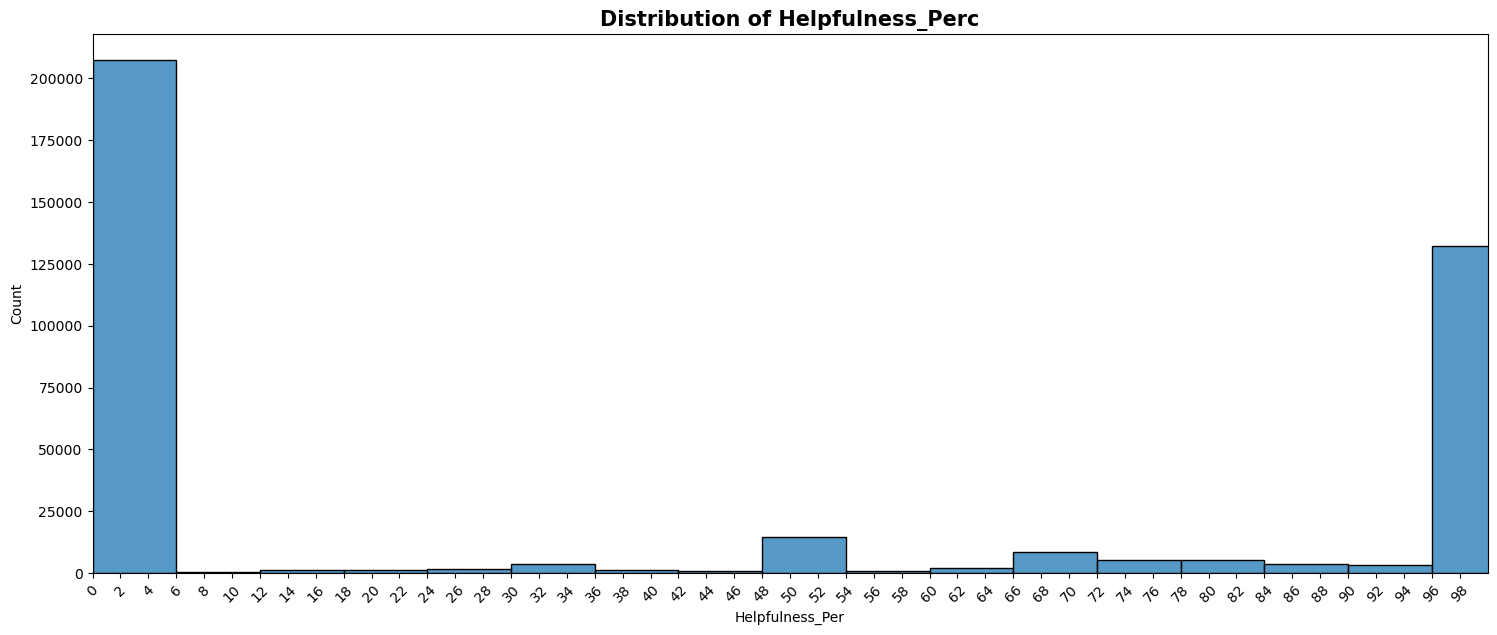

In [119]:
plt.figure(figsize=(18,7))
sns.histplot(data=df_review["Helpfulness_Per"], bins=50)
plt.title("Distribution of Helpfulness_Perc",fontweight='bold', fontsize=15)
plt.xticks(range(0,100,2), rotation=45)
plt.xlim(0, 100)
plt.show();

## Lets check out target variable

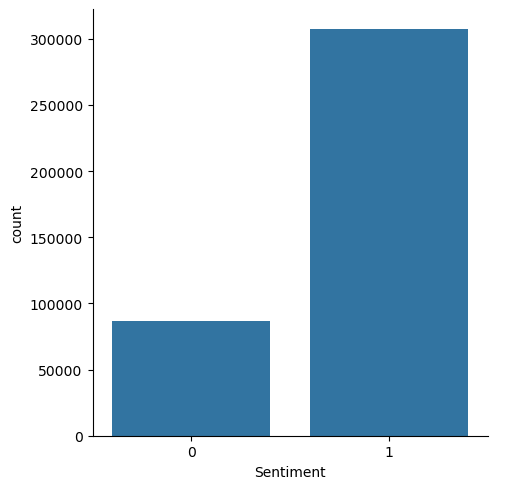

In [121]:
sns.catplot(data = df_review , x = 'Sentiment' , kind = 'count' )

#### here we can clearly see that out Target feature is immbalance so we cannot apply accuracy matric, so we have to go with the AUC-ROC curve (Area under Roc curve)
#### we can't choose Accuracy matric because it dosent it will make our model wrongly train , it will baise towards the single category ,our model will became overfit and it also not tells about the nature of the mistakes
#### we will choose confusion matrics and AUC because if higher the AUC then there is higher chances that model will predict 0 as 0 and 1 as 1 , ROC curve is ploted with TPR against FPR where TPR on y-axis and FPR on x-axis

#### lets give the category to the Helpfullness_per, 
if percentage  greater then equal to 75 then helpful, if percentange  greater  40 and less then 75 Intermmidate
if percentage greater then 0 and less then equal to 40 then Not useful , if equal to zero then not avilable


In [124]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_name = ['Condition', 'Class']
x.add_rows([ ["Helpfulness_Per >= 75", "Useful"],
    ["40 < Helpfulness_Per < 75","Intermediate"],
    ["0 < Helpfulness_Per <= 40","Not Useful"],
    ["Helpfulness_Per = 0","Not Available"]])


In [125]:
print(x)

+---------------------------+---------------+
|          Field 1          |    Field 2    |
+---------------------------+---------------+
|   Helpfulness_Per >= 75   |     Useful    |
| 40 < Helpfulness_Per < 75 |  Intermediate |
| 0 < Helpfulness_Per <= 40 |   Not Useful  |
|    Helpfulness_Per = 0    | Not Available |
+---------------------------+---------------+


In [126]:
df_review.loc[df_review['Helpfulness_Per'] >= 75 , 'type_of_helpful'] = 'useful'
df_review.loc[((df_review['Helpfulness_Per'] > 40) & ( df_review['Helpfulness_Per'] < 75)) , 'type_of_helpful'] = 'intermediate'
df_review.loc[((df_review['Helpfulness_Per'] > 0) & ( df_review['Helpfulness_Per'] <= 40)) , 'type_of_helpful'] = 'not useful'
df_review.loc[df_review['Helpfulness_Per'] == 0 , 'type_of_helpful'] = 'not avilable'



In [127]:
df_review

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
393928  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
393929  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
393930  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
393931  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
393932  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
393928                     0                       0      5  1299628800   
393929                     0                       0      2  1331251200   
393930                     2                       2      5  1329782400   
393931                     1                       1      5  1331596800   
393932                     0                       0      5  1338422400   

                                   Summary       Date  \
0                    Good Quality Dog Food 2011-04-27   
1                        Not as Advertised 2012-09-07   
2                    "Delight" says it all 2008-08-18   
3                           Cough Medicine 2011-06-13   
4                              Great taffy 2012-10-21   
...                                    ...        ...   
393928                 Will not do without 2011-03-09   
393929                        disappointed 2012-03-09   
393930            Perfect for our maltipoo 2012-02-21   
393931  Favorite Training and reward treat 2012-03-13   
393932                         Great Honey 2012-05-31   

                                                                                                                                                                                                                                                                                          clean_text  \
0                                                                                                                               bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better   
1                                                                                                                                                              product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo   
2       confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch   
3                                                                                                                                                                   looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal 

In [128]:
df_review.drop(columns = 'Helpfulness_Per', axis =1 , inplace = True)

In [129]:
df_review

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
393928  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
393929  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
393930  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
393931  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
393932  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
393928                     0                       0      5  1299628800   
393929                     0                       0      2  1331251200   
393930                     2                       2      5  1329782400   
393931                     1                       1      5  1331596800   
393932                     0                       0      5  1338422400   

                                   Summary       Date  \
0                    Good Quality Dog Food 2011-04-27   
1                        Not as Advertised 2012-09-07   
2                    "Delight" says it all 2008-08-18   
3                           Cough Medicine 2011-06-13   
4                              Great taffy 2012-10-21   
...                                    ...        ...   
393928                 Will not do without 2011-03-09   
393929                        disappointed 2012-03-09   
393930            Perfect for our maltipoo 2012-02-21   
393931  Favorite Training and reward treat 2012-03-13   
393932                         Great Honey 2012-05-31   

                                                                                                                                                                                                                                                                                          clean_text  \
0                                                                                                                               bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better   
1                                                                                                                                                              product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo   
2       confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch   
3                                                                                                                                                                   looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal 

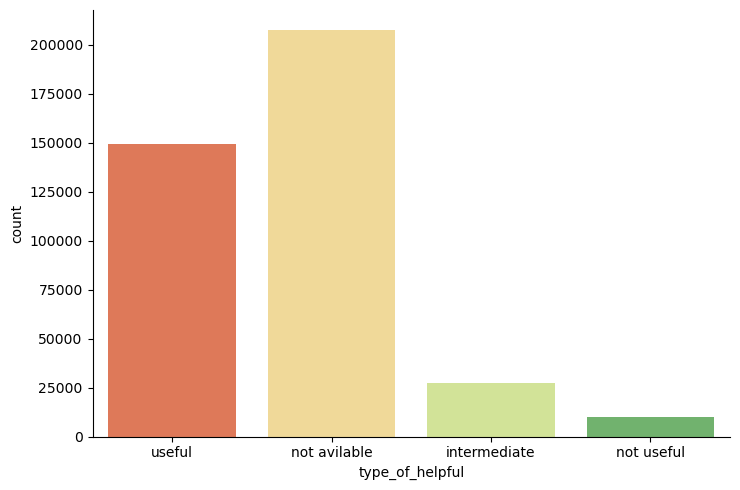

In [130]:
sns.catplot(data = df_review, x = 'type_of_helpful', kind = 'count', palette=sns.color_palette("RdYlGn", 4) , aspect = 1.5)

In [131]:
plt.figure(figsize=(10, 8))
value_counts = df_review['type_of_helpful'].value_counts()
labels = [f'{k}({value_counts[k]} samples)' for k in value_counts.keys()]

<Figure size 1000x800 with 0 Axes>

In [132]:
labels

['not avilable(207283 samples)',
 'useful(149485 samples)',
 'intermediate(27300 samples)',
 'not useful(9865 samples)']

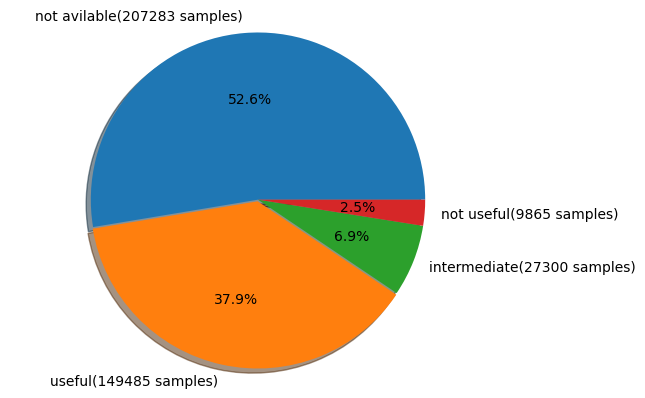

In [133]:
plt.pie(value_counts, labels = labels , autopct = '%1.1f%%', explode = [0,0.01,0,0], shadow = True)
plt.axis('equal')
plt.show()

#### we have to consider only polarity ones that are __useful__ and __not useful__, ignore __intermediate__ and __not avilable__

In [135]:
# plt.figure(figsize=(10, 8))
# value_counts = df_review['type_of_helpful'].value_counts()
# labels = [f'{k}({value_counts[k]} samples)' for k in value_counts.keys()]

In [136]:
value_counts.index[0]

'not avilable'

In [137]:
plt.figure(figsize=(10, 8))
value_counts = df_review['type_of_helpful'].value_counts()
labels = [f'{k}({value_counts[k]} samples)' for k in ['useful', 'not useful']]


<Figure size 1000x800 with 0 Axes>

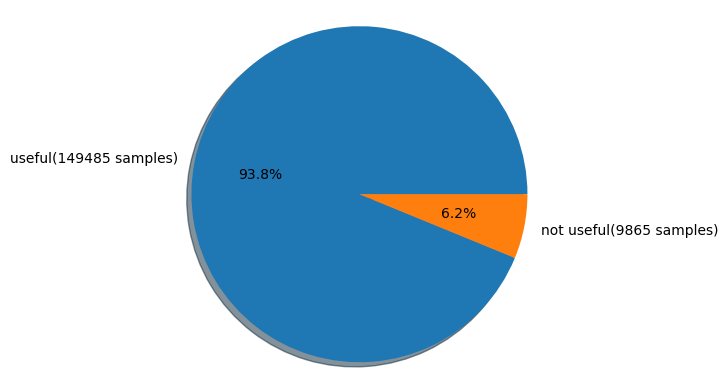

In [138]:
plt.pie(value_counts[1:4:2], labels = labels , autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

#### __94__ percent data is useful and __6__ percent is not useful

In [140]:
df_x = df_review[(df_review['type_of_helpful'] == 'useful') | (df_review['type_of_helpful'] == 'not useful')]
df_x

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
8            9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
10          11  B0001PB9FE  A3HDKO7OW0QNK4                     Canadian Fan   
...        ...         ...             ...                              ...   
393919  568441  B005ZC0RRO  A2TO5R8QLIITEF                              SAK   
393923  568445  B001EO7N10  A2SD7TY3IOX69B       BayBay "BayBay Knows Best"   
393924  568446  B001EO7N10  A2E5C8TTAED4CQ                    S. Linkletter   
393930  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
393931  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
8                          1                       1      5  1322006400   
10                         1                       1      5  1107820800   
...                      ...                     ...    ...         ...   
393919                     1                       1      5  1323734400   
393923                     3                       3      5  1245369600   
393924                     2                       2      5  1268006400   
393930                     2                       2      5  1329782400   
393931                     1                       1      5  1331596800   

                                                Summary       Date  \
0                                 Good Quality Dog Food 2011-04-27   
2                                 "Delight" says it all 2008-08-18   
3                                        Cough Medicine 2011-06-13   
8                                            Yay Barley 2011-11-23   
10                      The Best Hot Sauce in the World 2005-02-08   
...                                                 ...        ...   
393919  Delicious, all natural and allergy free treats! 2011-12-13   
393923                   Best Value for Chinese 5 Spice 2009-06-19   
393924                                Five Spice Powder 2010-03-08   
393930                         Perfect for our maltipoo 2012-02-21   
393931               Favorite Training and reward treat 2012-03-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             clean_text  \
0                                                                                                                                                                                                                                                                                                                                  bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better   
2                                                                                                                                                                                                          confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthf

<Axes: xlabel='Sentiment', ylabel='count'>

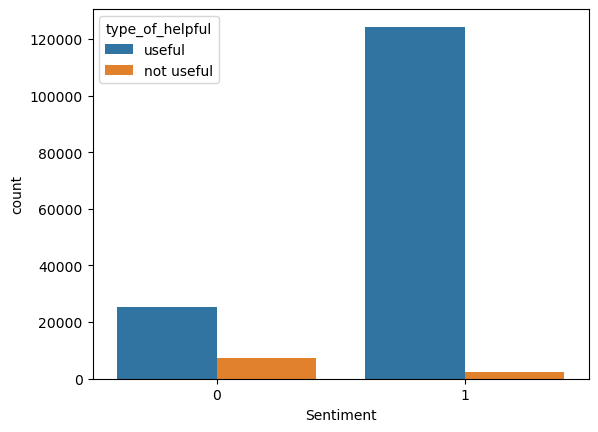

In [141]:
sns.countplot(data = df_x, x = 'Sentiment', hue = 'type_of_helpful'  )

#### we can clearly see that there are maximum reviews are useful in positive sentiment and also in negitive sentiment people find some amount of useful reviews 

#### Lets assign the word count or the length of each Text review

In [144]:
df_review['word_count'] = df_review['clean_text'].apply(lambda x: len(x.split()))

In [145]:
df_x['word_count'] = df_x['clean_text'].apply(lambda x: len(x.split()))

#### lets review the length of the reviews on basis of helpfulness

<Axes: xlabel='word_count', ylabel='type_of_helpful'>

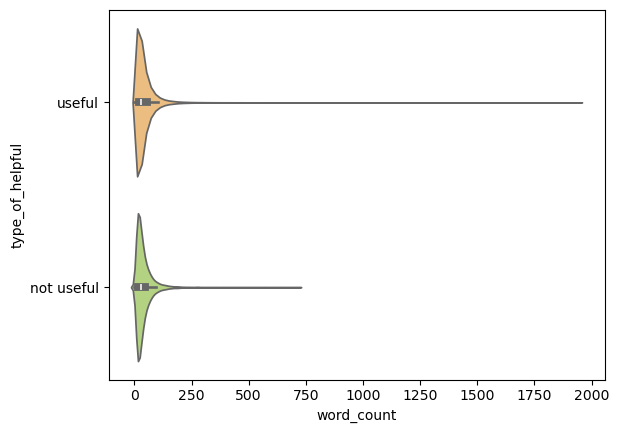

In [147]:
sns.violinplot(data = df_x , x = 'word_count', y = 'type_of_helpful', palette=sns.color_palette("RdYlGn", 2))

#### there are so many outliers so we will consider only those text having length less then equal to 500 

In [149]:
df_x_500 = df_x[df_x['word_count']<500]
df_x_500

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
8            9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
10          11  B0001PB9FE  A3HDKO7OW0QNK4                     Canadian Fan   
...        ...         ...             ...                              ...   
393919  568441  B005ZC0RRO  A2TO5R8QLIITEF                              SAK   
393923  568445  B001EO7N10  A2SD7TY3IOX69B       BayBay "BayBay Knows Best"   
393924  568446  B001EO7N10  A2E5C8TTAED4CQ                    S. Linkletter   
393930  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
393931  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
8                          1                       1      5  1322006400   
10                         1                       1      5  1107820800   
...                      ...                     ...    ...         ...   
393919                     1                       1      5  1323734400   
393923                     3                       3      5  1245369600   
393924                     2                       2      5  1268006400   
393930                     2                       2      5  1329782400   
393931                     1                       1      5  1331596800   

                                                Summary       Date  \
0                                 Good Quality Dog Food 2011-04-27   
2                                 "Delight" says it all 2008-08-18   
3                                        Cough Medicine 2011-06-13   
8                                            Yay Barley 2011-11-23   
10                      The Best Hot Sauce in the World 2005-02-08   
...                                                 ...        ...   
393919  Delicious, all natural and allergy free treats! 2011-12-13   
393923                   Best Value for Chinese 5 Spice 2009-06-19   
393924                                Five Spice Powder 2010-03-08   
393930                         Perfect for our maltipoo 2012-02-21   
393931               Favorite Training and reward treat 2012-03-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             clean_text  \
0                                                                                                                                                                                                                                                                                                                                  bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better   
2                                                                                                                                                                                                          confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthf

([<matplotlib.axis.XTick at 0x32e468f50>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140'),
  Text(150, 0, '150'),
  Text(160, 0, '160'),
  Text(170, 0, '170'),
  Text(180, 0, '180'),
  Text(190, 0, '190'),
  Text(200, 0, '200'),
  Text(210, 0, '210'),
  Text(220, 0, '220'),
  Text(230, 0, '230'),
  Text(240, 0, '240'),
  Text(250, 0, '250'),
  Text(260, 0, '260'),
  Text(270, 0, '270'),
  Text(280, 0, '280'),
  Text(290, 0, '290'),
  Text(300, 0, '300'),
  Text(310, 0, '310'),
  Text(320, 0, '320'),
  Text(330, 0, '330'),
  Text(340, 0, '340'),
  Text(350, 0, '350'),
  Text(360, 0, '360'),
  Text(370, 0, '370'),
  Text(380, 0, '380'),
  Text(390, 0, '390'),
  Text(400, 0, '400'),
  Text(410, 0, '410'),
  Text(420, 0,

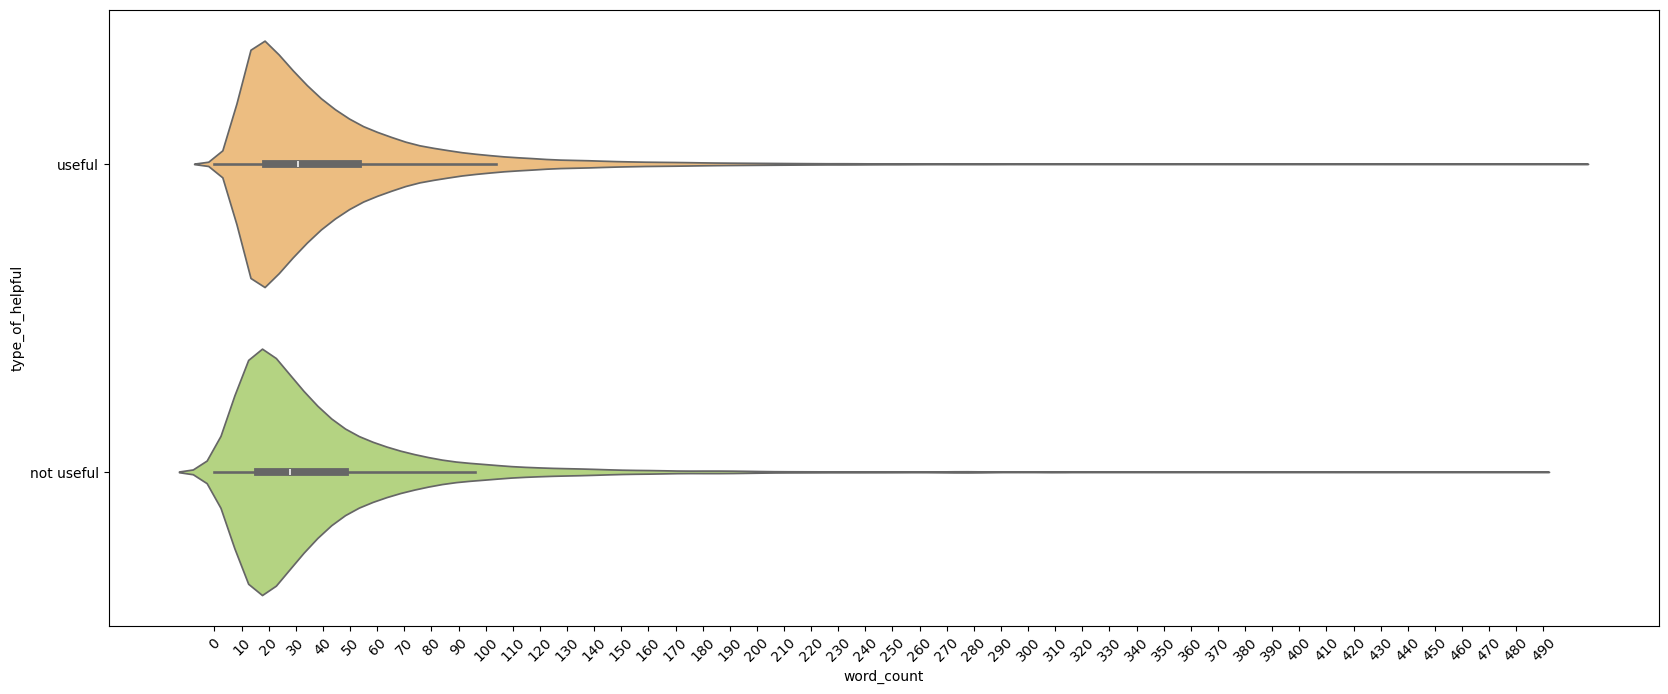

In [150]:
plt.figure(figsize = (20,8))
sns.violinplot(data = df_x_500 , x = 'word_count', y = 'type_of_helpful', palette=sns.color_palette("RdYlGn", 2))
plt.xticks(range(0,500,10), rotation=45)


In [151]:
df_x_500.groupby('type_of_helpful')['word_count'].describe()

count       mean        std  min   25%   50%   75%    max
type_of_helpful                                                              
not useful         9852.0  39.715185  41.062526  0.0  16.0  28.0  48.0  479.0
useful           149412.0  43.368518  40.388302  0.0  19.0  31.0  53.0  499.0

#### here we can see that both are in log normal form, means shot reviews are helpful 
1. average length of useful reviews are according to stats are 30-40

## Wordcloud for reviews

In [154]:
from wordcloud import WordCloud

In [155]:
text = " ".join(r for r in df_review['clean_text'])
wordcloud = WordCloud(background_color="white", width=1200, height=600).generate(text)

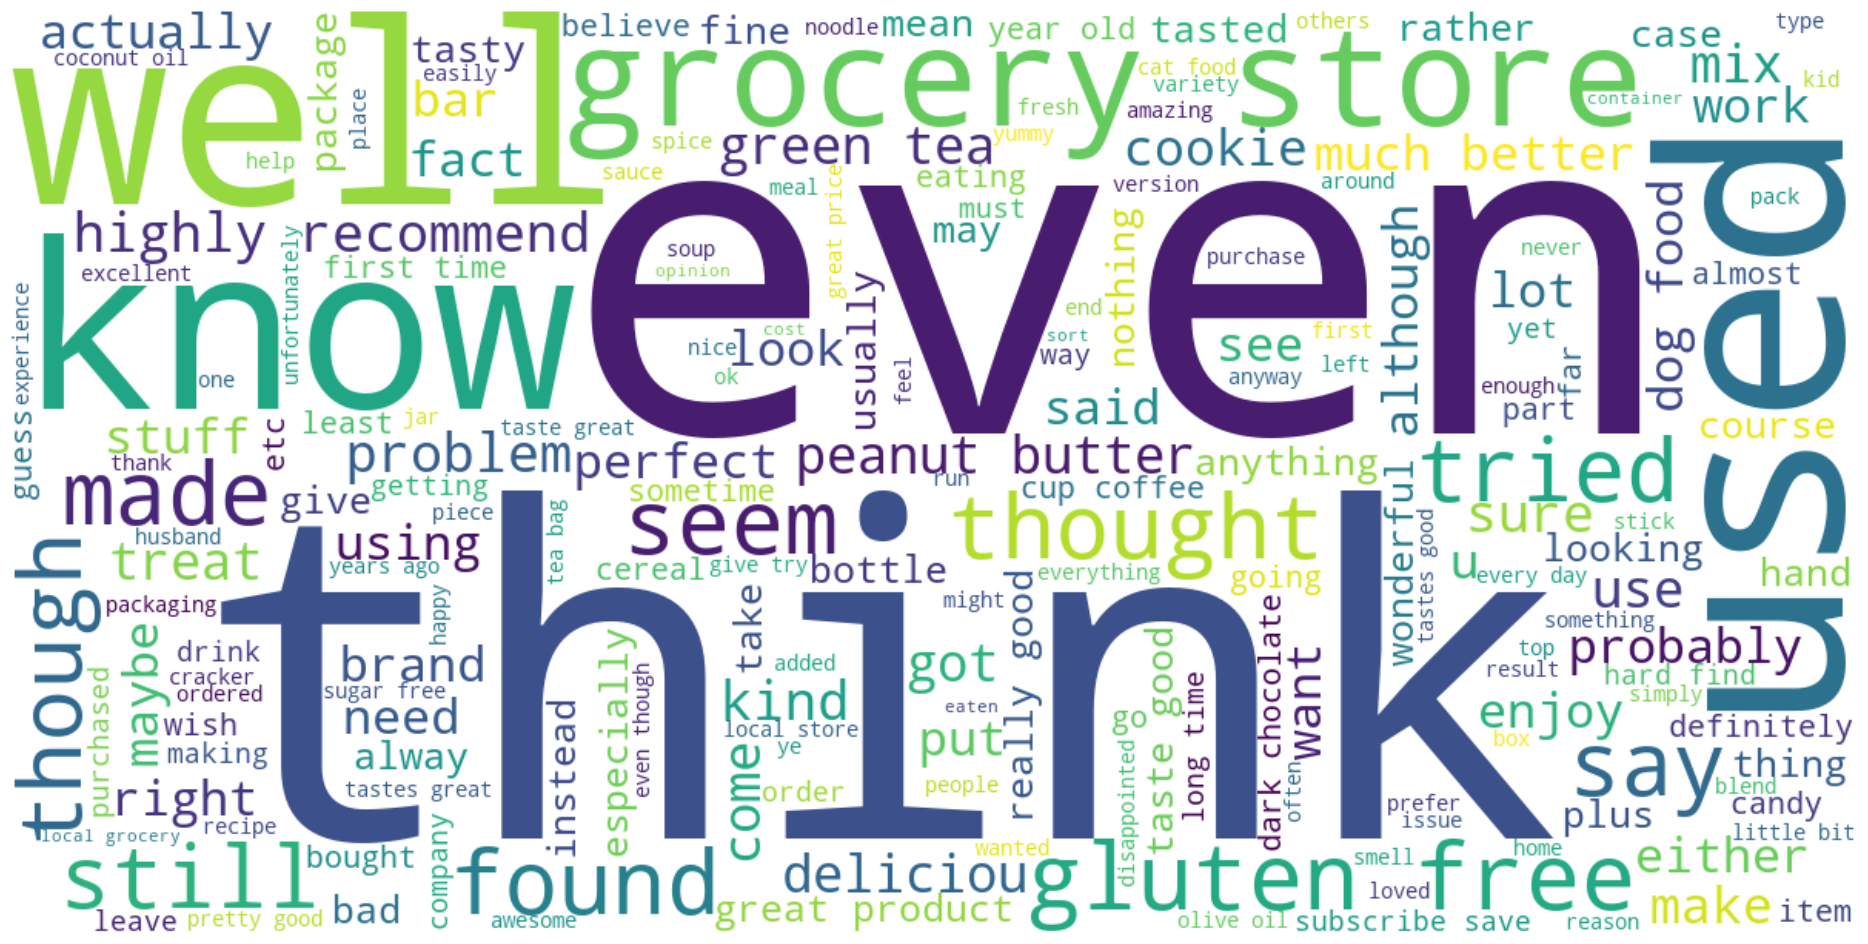

In [156]:
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### lets for only positive sentiment

In [158]:
df_p = df_review[df_review['Sentiment'] == 1]
text = " ".join(r for r in df_p['clean_text'])
wordcloud = WordCloud(background_color="white", width=1200, height=600).generate(text)

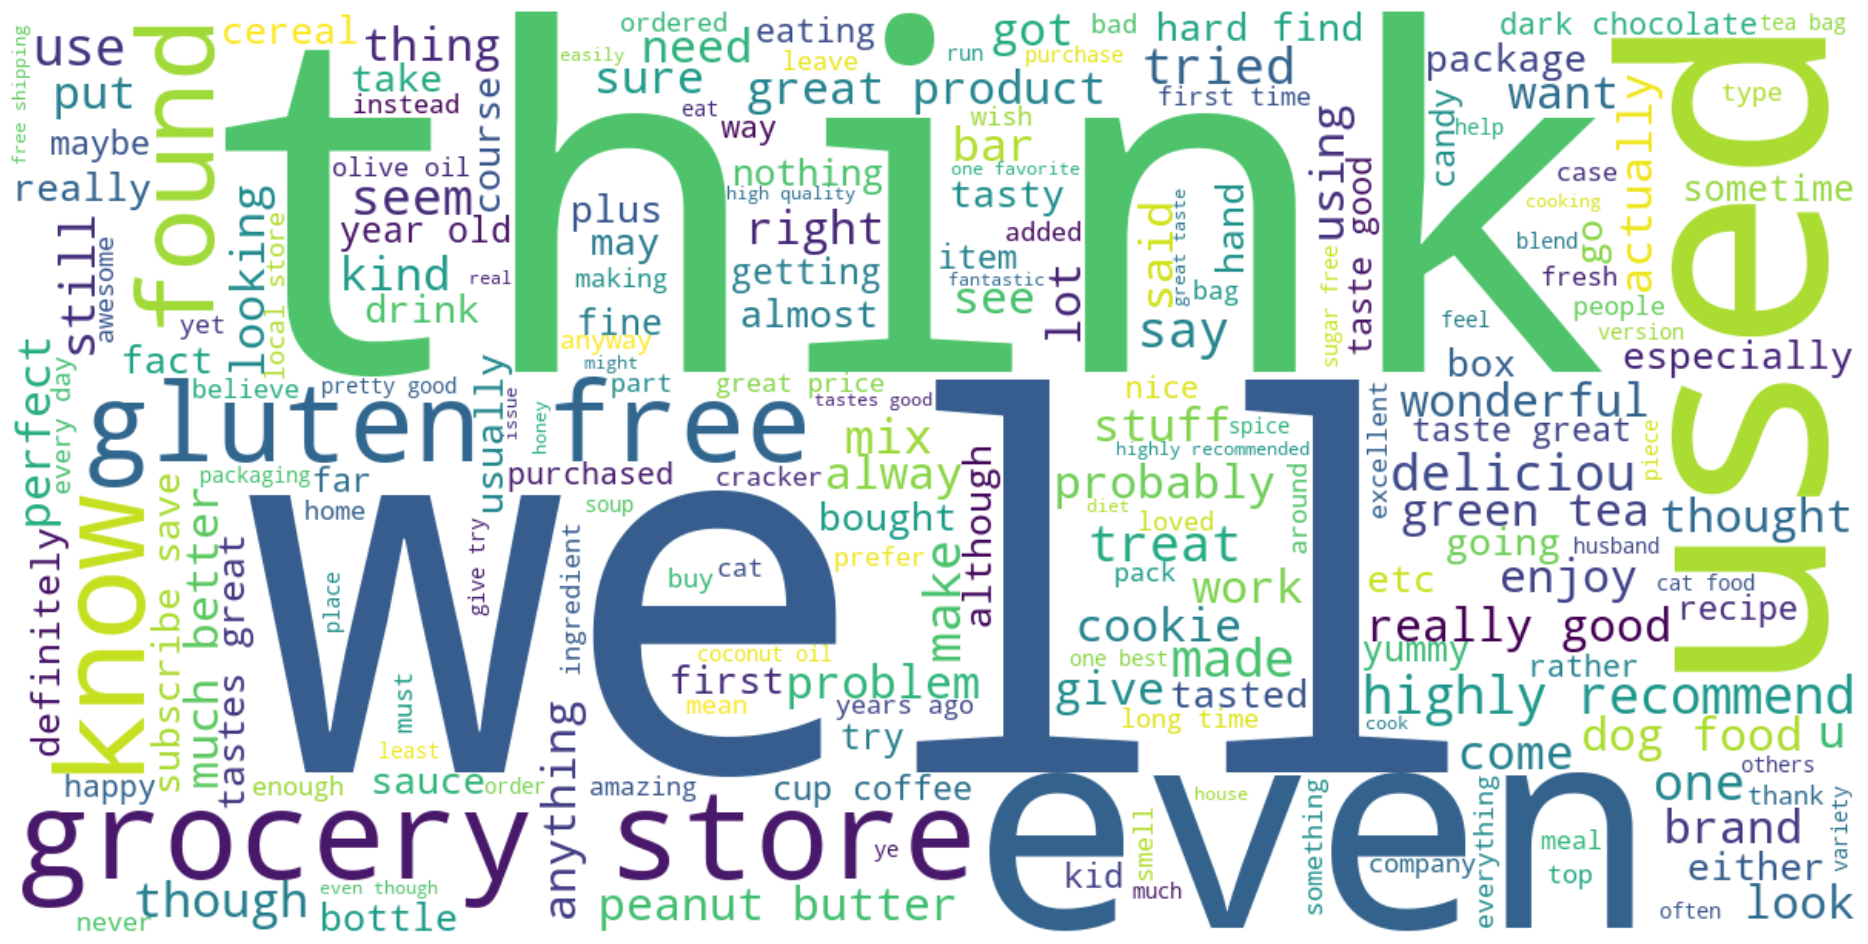

In [159]:
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### here we can see that there are words for positive sentiments like
1. well
2. delicious
3. highly recommend
4. really good
5. great Product
etc

In [161]:
df_n = df_review[df_review['Sentiment'] == 0]
text = " ".join(r for r in df_n['clean_text'])
wordcloud = WordCloud(background_color="white", width=1200, height=600).generate(text)

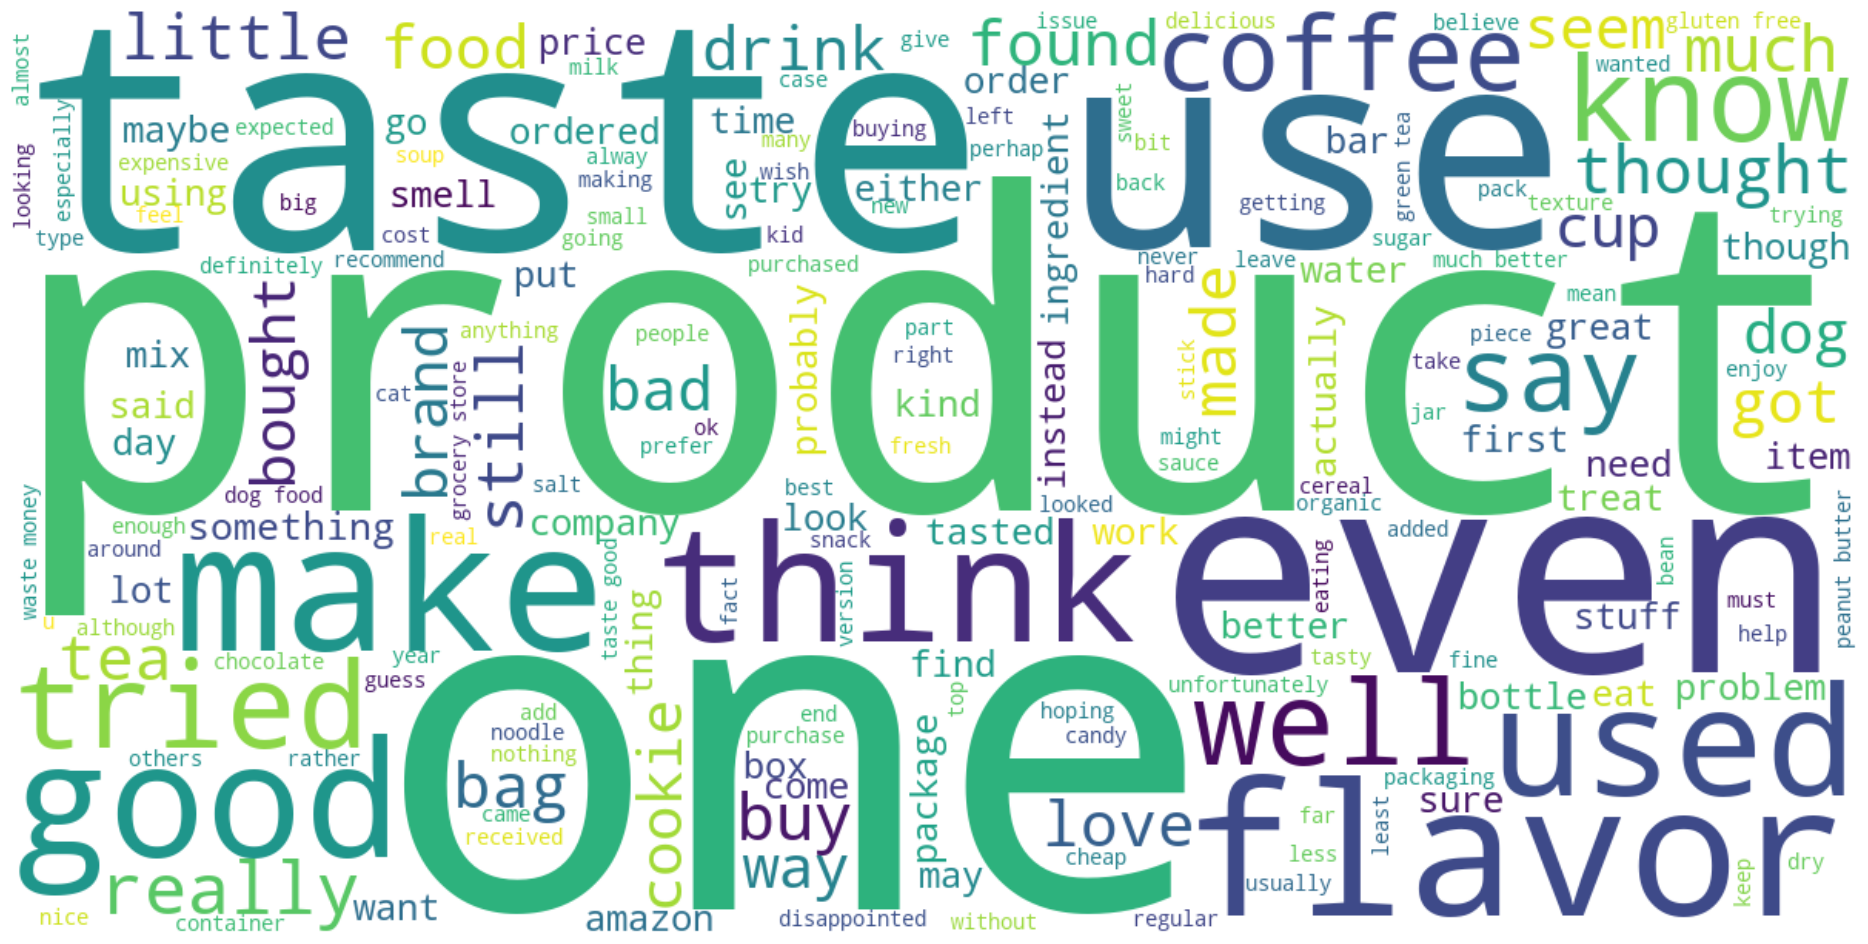

In [162]:
plt.figure(figsize=(30,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### for negitive reviews there are 
1. waste money
2. tried
3. disappointed
4. expensice etc

### Now last step is we will check which is better stemming or lemmatization both are the technique use to convert word into its root form

#### first we will perform all type of stemming

### 1. Poerter stemmer

In [167]:
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize

In [168]:
porter = PorterStemmer()
a =df_review['clean_text'][0]
word_list = word_tokenize(a)

In [169]:
word_list

['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'found',
 'good',
 'quality',
 'product',
 'looks',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [170]:
for i in word_list:
    print( f'{i} -> {porter.stem(i)}')

bought -> bought
several -> sever
vitality -> vital
canned -> can
dog -> dog
food -> food
products -> product
found -> found
good -> good
quality -> qualiti
product -> product
looks -> look
like -> like
stew -> stew
processed -> process
meat -> meat
smells -> smell
better -> better
labrador -> labrador
finicky -> finicki
appreciates -> appreci
product -> product
better -> better


#### several -> sever ,quality -> qualiti, appreciates -> appreci wrongly spelled

## 2. Snowball Stemmer

In [173]:
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')
for i in word_list:
    print( f'{i} -> {snowball.stem(i)}')

bought -> bought
several -> sever
vitality -> vital
canned -> can
dog -> dog
food -> food
products -> product
found -> found
good -> good
quality -> qualiti
product -> product
looks -> look
like -> like
stew -> stew
processed -> process
meat -> meat
smells -> smell
better -> better
labrador -> labrador
finicky -> finicki
appreciates -> appreci
product -> product
better -> better


In [174]:
#### several -> sever ,quality -> qualiti, appreciates -> appreci wrongly spelled performing same mistake aboveb

### 3. Lancanster Stemmer

In [176]:
from nltk.stem.lancaster import LancasterStemmer

In [177]:
lancaster = LancasterStemmer()

In [178]:
for i in word_list:
    print( f'{i} -> {lancaster.stem(i)}')

bought -> bought
several -> sev
vitality -> vit
canned -> can
dog -> dog
food -> food
products -> produc
found -> found
good -> good
quality -> qual
product -> produc
looks -> look
like -> lik
stew -> stew
processed -> process
meat -> meat
smells -> smel
better -> bet
labrador -> labrad
finicky -> finicky
appreciates -> apprecy
product -> produc
better -> bet


#### It is performing worst

## Lemmatization

## 1. Wordnet Lemmatizer

In [182]:
from nltk.stem import WordNetLemmatizer

In [183]:
lemmatizer = WordNetLemmatizer()
for i in word_list:
    print( f'{i} -> {lemmatizer.lemmatize(i)}')

bought -> bought
several -> several
vitality -> vitality
canned -> canned
dog -> dog
food -> food
products -> product
found -> found
good -> good
quality -> quality
product -> product
looks -> look
like -> like
stew -> stew
processed -> processed
meat -> meat
smells -> smell
better -> better
labrador -> labrador
finicky -> finicky
appreciates -> appreciates
product -> product
better -> better


#### it's look like correct but not as we want

## 2. Spacy Library

In [186]:
import spacy

In [187]:
nlp = spacy.load('en_core_web_sm', disable= ['parser','ner'])
doc = nlp(df_review['clean_text'][0])

In [188]:
doc

bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better

In [189]:
print(f"After Lemmatization: {' '.join([token.lemma_ if token.lemma_ != '-PRON-' else token for token in doc])}")

After Lemmatization: buy several vitality can dog food product find good quality product look like stew process meat smell well labrador finicky appreciate product well


we can see here __better__ -> well , __bought__ -> buy

In [191]:
def spacy_lemmatize(x):
    doc = nlp(x)
    return ' '.join([token.lemma_ if token.lemma_ != '-PRON-' else token for token in doc])

### so lemmatization by spacy performs well 

#### we will perform Spacy lemmatization on whole data

In [194]:
from tqdm import tqdm
tqdm.pandas()

In [195]:
df_review['clean_text'] = df_review['clean_text'].progress_apply(lambda x: spacy_lemmatize(x))

100%|██████████████████████████████████| 393933/393933 [16:41<00:00, 393.19it/s]


#### lets exreact out the important feature

In [197]:
df_review = df_review.sort_values(by= 'Time').reset_index(drop = True)

In [266]:
df_review

Id   ProductId          UserId                ProfileName  \
0       150524  0006641040   ACITT7DI6IDDL            shari zychinski   
1       150501  0006641040   AJ46FKXOVC7NR         Nicholas A Mesiano   
2       451856  B00004CXX9   AIUWLEQ1ADEG5           Elizabeth Medina   
3       230285  B00004RYGX  A344SMIA5JECGM            Vincent P. Ross   
4       451855  B00004CXX9   AJH6LUC1UT1ON   The Phantom of the Opera   
...        ...         ...             ...                        ...   
393928  487720  B00816PNK2   ABDQA93G2GTXC                 Sheila Fox   
393929  427648  B001VNGHSO   AGIFGYN717K2K              RIchard Sarta   
393930  497428  B0015A2W32  A1SEHFQQ30AR0E                      jmble   
393931  267764  B000FMZO8G  A1EBWGUV88OZ2G        Kimberly A. Dickens   
393932   41317  B008NDSNAU  A2Z0XFW79HXASE  Kelby Scandrett "Kaiahso"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          0                       0      5   939340800   
1                          2                       2      5   940809600   
2                          0                       0      5   944092800   
3                          1                       2      5   944438400   
4                          0                       0      5   946857600   
...                      ...                     ...    ...         ...   
393928                     0                       0      5  1351209600   
393929                     0                       0      1  1351209600   
393930                     0                       0      5  1351209600   
393931                     0                       0      5  1351209600   
393932                     0                       0      5  1351209600   

                                                             Summary  \
0                                          EVERY book is educational   
1       This whole series is great way to spend time with your child   
2                                               Entertainingl Funny!   
3                                            A modern day fairy tale   
4                                                         FANTASTIC!   
...                                                              ...   
393928                                              This is so good!   
393929                                             Not for sprouting   
393930                                                       Perfect   
393931                                                  Great snack!   
393932                                                           Yum   

             Date  \
0      1999-10-08   
1      1999-10-25   
2      1999-12-02   
3      1999-12-06   
4      2000-01-03   
...           ...   
393928 2012-10-26   
393929 2012-10-26   
393930 2012-10-26   
393931 2012-10-26   
393932 2012-10-26   

                                                                                                                                                                                                                                                                                         clean_text  \
0                                                                              witty little book make son laugh loud recite car driving along always sing refrain learn whale india droop rose love new word book introduce silliness classic book willing bet son still able recite memory college   
1                                                                                        remember see show air television year ago child sister later buy lp day thirty something use series book song student teaching preschooler turn whole school purchasing cd along book child tradition life   
2                                                                                                                                                                                                    beetlejuice well write movie every

In [284]:
df_final = df_review[['clean_text','Sentiment']]

#### lets save this dataframe into excel file

In [202]:
df_final.to_excel('final_dataset.xlsx',index = False)

## Feature Engineering

#### now we will convert textual data into vectors

#### we are only going to take 100000 random samples because dataset is to big and it will take so much time

In [286]:
df = df_final.sample(100000, random_state = 100)

In [288]:
X = df['clean_text']
y = df['Sentiment']
print(X.shape[0])
print(y.shape[0])

100000
100000


In [293]:
from sklearn.model_selection import train_test_split

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 100)

In [297]:
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

70000
30000
70000
30000


In [299]:
X_train.info()

<class 'pandas.core.series.Series'>
Index: 70000 entries, 345312 to 171739
Series name: clean_text
Non-Null Count  Dtype 
--------------  ----- 
70000 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [301]:
# save this array
np.save('split dataset/X_train',X_train)
np.save('split dataset/X_test',X_test)
np.save('split dataset/y_train',y_train)
np.save('split dataset/y_test',y_test)

## 1. BOW (Bag of Words)

In [317]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [319]:
bow = CountVectorizer()
bow.fit(X_train)
X_train_bow = bow.transform(X_train)
X_test_bow = bow.transform(X_test)
bow_features = bow.get_feature_names_out()
print(X_train_bow.get_shape())
print(X_test_bow.get_shape())


(70000, 43340)
(30000, 43340)


In [321]:
# saving bow vectors
import pickle

In [323]:
pickle.dump(X_train_bow,open('bow_vectors/X_train_bow','wb'))
pickle.dump(X_test_bow,open('bow_vectors/X_test_bow','wb'))
pickle.dump(np.array(bow_features),open('bow_vectors/bow_features','wb'))

## 2. TF-IDF

In [325]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [327]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
tfidf_features = tfidf.get_feature_names_out()
print(X_train_tfidf.get_shape())
print(X_test_tfidf.get_shape())

(70000, 43340)
(30000, 43340)


In [329]:
#saving
pickle.dump(X_train_tfidf,open('tfidf_vectors/X_train_tfidf','wb'))
pickle.dump(X_test_tfidf,open('tfidf_vectors/X_test_tfidf','wb'))
pickle.dump(np.array(tfidf_features),open('tfidf_vectors/tfidf_features','wb'))

## Word2Vec

In [ ]:
x_reviews = X_train.values
train_sentance = [i.split() for i in x_reviews]

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [ ]:
w2v_train_model = Word2Vec(train_sentance, min_count = 5, vector_size = 50, workers = 4)
w2v_words = list(w2v_train_model.wv.key_to_index.keys())

In [ ]:
w2v_words

1. `w2v_train = Word2Vec(train_sentance, min_count = 5, vector_size = 50, workers = 6)` - This line creates a Word2Vec model using the `Word2Vec` class. The `train_sentance` is the input data for training the model. The `min_count` parameter specifies the minimum frequency of a word to be included in the model's vocabulary. The `vector_size` parameter sets the dimensionality of the word vectors, and the `workers` parameter specifies the number of threads to use for training.

2. `w2v_words = list(w2v_train.wv.key_to_index.keys())` - This line retrieves the list of words present in the Word2Vec model's vocabulary. It accesses the `wv` attribute of the trained Word2Vec model to get the word vectors, and then retrieves the keys (words) from the `key_to_index` dictionary. Finally, it converts the keys into a list and assigns it to the variable `w2v_words`.

In [ ]:
# saving the model

In [ ]:
pickle.dump(np.array(w2v_words), open('w2v_words','wb'))

## 3. Average Word2Vec

In [ ]:
train_reviews = X_train.values
train_sentance = [i.split() for i in train_reviews]

In [ ]:
vector_train = []
for sen in tqdm(train_sentance):
    sen_vec = np.zeros(50)
    cnt_words = 0
    for word in sen:
        if word in w2v_words:
            vector = w2v_train_model.wv[word]
            sen_vec += vector
            cnt_words += 1
    if cnt_words!=0:
        sen_vec /= cnt_words
    vector_train.append(sen_vec)

In [ ]:
test_reviews = X_test.values
test_sentance = [i.split() for i in test_reviews]

In [ ]:
vector_test = []
for sen in tqdm(test_sentance):
    sen_vec = np.zeros(50)
    cnt = 0
    for word in sen:
        if word in w2v_words:
            vector = w2v_train_model.wv[word]
            sen_vec += vector
            cnt += 1
    if cnt!=0:
        sen_vec /= cnt
    vector_test.append(sen_vec)

In [ ]:
#saving
X_train_avgw2v = np.array(vector_train)
X_test_avgw2v = np.array(vector_test)
pickle.dump(np.array(X_train_avgw2v), open('avgw2v_train','wb'))
pickle.dump(np.array(X_test_avgw2v), open('avgw2v_test','wb'))

In [331]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))